# Sistemas de referencia de coordenadas

Los sistemas de referencia de coordenadas (CRS) son importantes porque las formas geométricas en un GeoDataFrame son simplemente una colección de coordenadas en un espacio arbitrario. Un CRS le dice a Python cómo se relacionan esas coordenadas con los lugares de la Tierra. Una proyección de mapa (o un sistema de coordenadas proyectadas) es una transformación sistemática de las latitudes y longitudes en una superficie plana donde las unidades se representan comúnmente como metros (en lugar de grados decimales). Esta transformación se utiliza para representar la tierra tridimensional en un mapa bidimensional plano.

## Gestión de sistemas de referencia de coordenadas en pyproj y geopandas

In [1]:
# Importar paquete
import geopandas as gpd

# Cargar archivo
fp = r"E:\Python\02_SIG_Python\Resultado\Poligono_creado.shp"
data = gpd.read_file(fp)

In [2]:
data

,Nombre,geometry
0,GEOMATICA,"POLYGON ((-75.03761 -8.30069, -75.02323 -8.298..."


In [3]:
# Verificar proyeccion
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
data.crs.name

'WGS 84'

In [5]:
data["geometry"].head()

0    POLYGON ((-75.03761 -8.30069, -75.02323 -8.298...
Name: geometry, dtype: geometry

## Reproyeccion a UTM

In [6]:
# Hagamos una copia de seguridad de nuestros datos
data_wgs84 = data.copy()

# Reproject the data
data_utm = data.to_crs(epsg=32718)

In [7]:
# Verificar las nuevas coordenadas UTM
data_utm["geometry"].head()

0    POLYGON ((495858.502 9082459.632, 497442.080 9...
Name: geometry, dtype: geometry

In [8]:
data_utm.crs

<Derived Projected CRS: EPSG:32718>
Name: WGS 84 / UTM zone 18S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 78°W and 72°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Brazil. Chile. Colombia. Ecuador. Peru.
- bounds: (-78.0, -80.0, -72.0, 0.0)
Coordinate Operation:
- name: UTM zone 18S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Generar mapa visualizacion

In [9]:
import matplotlib.pyplot as plt

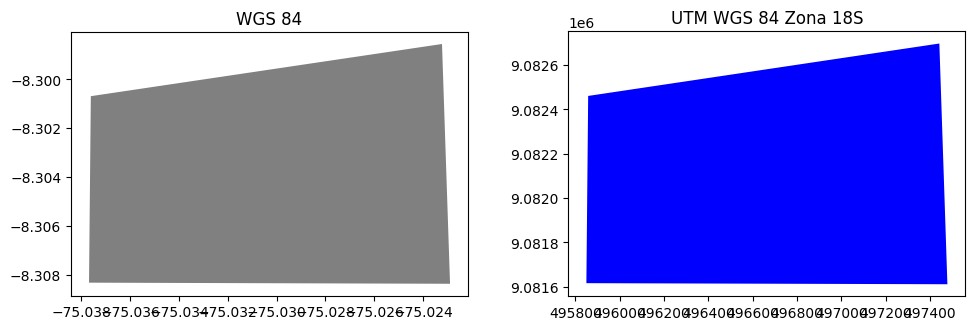

In [10]:
# Make subplots that are next to each other
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

# Plot the data in WGS84 CRS
data_wgs84.plot(ax=ax1, facecolor="gray")

# Add title
ax1.set_title("WGS 84")

# Plot the one with ETRS-LAEA projection
data_utm.plot(ax=ax2, facecolor="blue")

# Add title
ax2.set_title("UTM WGS 84 Zona 18S")

# Set aspect ratio as 1
ax1.set_aspect(aspect=1)
ax2.set_aspect(aspect=1)

# Remove empty white space around the plot
plt.tight_layout()

## Exportar el reproyectado

In [11]:
import os

In [12]:
os.getcwd()

'C:\\Users\\GEOMATICA\\PYTHON\\02_SIG'

In [13]:
ruta_archivos = r"E:\Python\02_SIG_Python\Resultado"
os.chdir(ruta_archivos) # Cambiar ruta trabajo
os.getcwd() # Consultar ruta trabajo

'E:\\Python\\02_SIG_Python\\Resultado'

In [14]:
# Ouput filepath
outfp = "Poligono_UTM_18S.shp"

# Save to disk
data_utm.to_file(outfp)

## Manejo de diferentes formatos de CRS

In [15]:
# Import CRS class from pyproj
from pyproj import CRS

### Crear un diccionario Projeccion

In [16]:
# PROJ dictionary:
crs_dict = data_wgs84.crs

In [17]:
print("PROJ dictionary:\n", crs_dict)

PROJ dictionary:
 epsg:4326


In [18]:
# pyproj CRS object:
crs_object = CRS(data_wgs84.crs)

In [21]:
crs_object

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
print("CRS object:\n",crs_object)

CRS object:
 GEOGCRS["WGS 84",ENSEMBLE["World Geodetic System 1984 ensemble",MEMBER["World Geodetic System 1984 (Transit)"],MEMBER["World Geodetic System 1984 (G730)"],MEMBER["World Geodetic System 1984 (G873)"],MEMBER["World Geodetic System 1984 (G1150)"],MEMBER["World Geodetic System 1984 (G1674)"],MEMBER["World Geodetic System 1984 (G1762)"],MEMBER["World Geodetic System 1984 (G2139)"],ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1]],ENSEMBLEACCURACY[2.0]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],CS[ellipsoidal,2],AXIS["geodetic latitude (Lat)",north,ORDER[1],ANGLEUNIT["degree",0.0174532925199433]],AXIS["geodetic longitude (Lon)",east,ORDER[2],ANGLEUNIT["degree",0.0174532925199433]],USAGE[SCOPE["Horizontal component of 3D system."],AREA["World."],BBOX[-90,-180,90,180]],ID["EPSG",4326]]


### Determinar codigo EPSG

In [23]:
# Determinar codigo EPSG
crs_epsg = CRS(data_wgs84.crs).to_epsg(min_confidence=25)

In [24]:
print("EPSG code: \n",crs_epsg)

EPSG code: 
 4326


### Generar el string Proyection 4

In [26]:
# Generar el string Proyection 4
crs_proj4 = CRS(data_wgs84.crs).to_proj4()

c:\python395\lib\site-packages\pyproj\crs\crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


In [29]:
print("PROJ string: \n", crs_proj4)

PROJ string: 
 +proj=longlat +datum=WGS84 +no_defs +type=crs


### Descripcion mas a detalle proyeccion

In [30]:
# Name
print("Name:", crs_object.name)

# Coordinate system
print("Coordinate system:", crs_object.coordinate_system)

# Bounds of the area where CRS is used
print("Bounds:", crs_object.area_of_use.bounds)

Name: WGS 84
Coordinate system: ellipsoidal
Bounds: (-180.0, -90.0, 180.0, 90.0)
